In [ ]:
# GPU TEST

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))    

In [ ]:
# Importing libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

import pickle
import gzip
import numpy as np
import pandas as pd

In [ ]:
# Loading Dataset

with open('2016.04C.multisnr.pkl','rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [ ]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], p.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(p[mod,snr])
        for i in range(p[(mod,snr)].shape[0]): lbl.append((mod,snr))
X = np.vstack(X)
print(X.shape)
print('One Sample : ')
print(X[1])

In [ ]:
X

In [6]:
print('keys:')
print(p.keys())

keys:
dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('PAM4', 18), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('8PSK', -18), ('PAM4', -6), ('WBFM', -18), ('BPSK', 8), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('AM-SSB', 6), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('AM-SSB', -12), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('AM-DSB', -18), ('QPSK', 8), ('PAM4', 14), ('WBFM', -8), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('8PSK', -10), ('AM-SSB', -18), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('WBFM', -14), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('AM-SSB', 8), ('QAM16', 8), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('AM-SSB', -2), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('AM-SSB', 2), ('WBFM', 10), 

In [7]:
label=[]
mod=[]
data=[]
for i in range(len(lbl)):
        label.append(lbl[i][0])
        mod.append(lbl[i][1])
        data.append(X[i])

data=pd.DataFrame([label,mod,data])
dataset = data.T
print(dataset)

           0    1                                                  2
0       8PSK  -20  [[24.714563, -29.568644, 92.68012, -0.6211241,...
1       8PSK  -20  [[-7.4243298, 119.80825, -111.365616, -27.8646...
2       8PSK  -20  [[140.26158, -55.305504, 91.71414, 35.363003, ...
3       8PSK  -20  [[59.466553, -58.749474, -63.58964, 109.952866...
4       8PSK  -20  [[-18.136866, -86.98702, 2.8082519, -72.49883,...
...      ...  ...                                                ...
162055  WBFM   18  [[-0.4857278, -0.507521, -0.5296707, -0.518121...
162056  WBFM   18  [[-0.4470213, -0.43725014, -0.43090314, -0.432...
162057  WBFM   18  [[-0.7416414, -0.7185424, -0.689575, -0.695628...
162058  WBFM   18  [[-0.6813814, -0.69127196, -0.6815096, -0.6873...
162059  WBFM   18  [[-0.6809907, -0.7188972, -0.6984149, -0.69268...

[162060 rows x 3 columns]


In [8]:
X1 = dataset.iat[15280,2]

X1 = X1.flatten()
print(X.shape)

import matplotlib.pyplot as plt
# visualizing the results
plt.figure(figsize=(3,3))
plt.plot(X1[1:129], color = 'red', label = 'Dim-1')
plt.plot(X1[129:256], color = 'green', label = 'Dim-2')
plt.title("Signal energy diagram")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.legend()

(162060, 2, 128)


(162060, 2, 128)


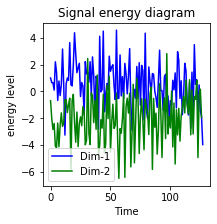

In [9]:
X1 = dataset.iat[14280,2]

X1 = X1.flatten()
print(X.shape)

import matplotlib.pyplot as plt
# visualizing the results
plt.figure(figsize=(3,3))
plt.plot(X1[1:129], color = 'blue', label = 'Dim-1')
plt.plot(X1[129:256], color = 'green', label = 'Dim-2')
plt.title("Signal energy diagram")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.legend()

(162060, 2, 128)


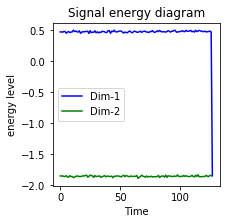

In [10]:
X1 = dataset.iat[21990,2]

X1 = X1.flatten()
print(X.shape)

import matplotlib.pyplot as plt
# visualizing the results
plt.figure(figsize=(3,3))
plt.plot(X1[1:129], color = 'blue', label = 'Dim-1')
plt.plot(X1[129:256], color = 'green', label = 'Dim-2')
plt.title("Signal energy diagram")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.legend()

In [11]:
print('shape of all data : ')
print(X.shape)

shape of all data : 
(162060, 2, 128)


In [12]:
shapes = []
snrs = []
mod_types = []
for x in p.keys():
    shapes.append(p[x].shape)
    snrs.append(x[1])
    mod_types.append(x[0])
print('Same distribution of number of samples as shown : ')
print(sorted(shapes)[0:20])
print(sorted(shapes)[20:40])
print(sorted(shapes)[40:60])

Same distribution of number of samples as shown : 
[(206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128)]
[(310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128)]
[(413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128)]


In [13]:
print("same modulation type but different SNRs:")
print(p["QPSK",-20].shape)
print(p["QPSK",-18].shape)
print(p["QPSK",-16].shape)
print(p["QPSK",-14].shape)
print(p["QPSK",-12].shape)
print(p["QPSK",-10].shape)
print(p["QPSK",-8].shape)
print(p["QPSK",-6].shape)
print(p["QPSK",-4].shape)
print(p["QPSK",-2].shape)
print(p["QPSK",0].shape)
print(p["QPSK",2].shape)
print(p["QPSK",4].shape)
print(p["QPSK",6].shape)
print(p["QPSK",8].shape)
print(p["QPSK",10].shape)
print(p["QPSK",12].shape)
print(p["QPSK",14].shape)
print(p["QPSK",16].shape)
print(p["QPSK",18].shape)

same modulation type but different SNRs:
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)


In [14]:
print("same SNR for Different modulation types:")
print(p["QPSK",2].shape)
print(p["PAM4",2].shape)
print(p["AM-DSB",2].shape)
print(p["QAM64",2].shape)
print(p["AM-SSB",2].shape)
print(p["QAM16",2].shape)
print(p["8PSK",2].shape)
print("values in keys:")
print(sorted(set(snrs)))
print(len(set(snrs)))
print(set(mod_types))
print(len(set(mod_types)))
print("all different shapes:")
print(sorted(set(shapes)))

same SNR for Different modulation types:
(622, 2, 128)
(622, 2, 128)
(705, 2, 128)
(206, 2, 128)
(705, 2, 128)
(310, 2, 128)
(413, 2, 128)
values in keys:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
20
{'WBFM', 'AM-SSB', 'QAM64', 'QAM16', 'QPSK', 'BPSK', 'AM-DSB', 'PAM4', '8PSK', 'CPFSK', 'GFSK'}
11
all different shapes:
[(206, 2, 128), (310, 2, 128), (413, 2, 128), (622, 2, 128), (705, 2, 128), (779, 2, 128), (1247, 2, 128)]


In [15]:
X_array = np.array(X)
print('before differentiation (2nd sample): ')
print(X_array[0])

X_derivative = np.diff(X_array)
print(X_derivative[0])

before differentiation (2nd sample): 
[[  24.714563    -29.568644     92.68012      -0.6211241    33.062744
    -6.2919946    -5.9258704  -131.96852     -69.56522      44.74652
   -89.15495    -101.97785     -18.323557    -30.385767      1.9968935
   -61.500935     37.332264    -28.064968     59.465668    -46.179398
   -26.009663    -52.362324     61.56313      65.796425     65.44162
    30.869577     43.397816     73.950745    -33.643257     -0.21010807
    96.22332      15.490614     41.540924     16.351875    -22.676212
    68.52634     -31.446701    -41.51053      47.405647     55.173832
    33.460255    -33.191044    -20.125128    104.928314     26.355001
   -81.8093       44.091236   -119.93215     -24.723804     24.986504
   -50.097115    128.2814        9.491681    -94.38004      15.686162
    -6.078274    -73.28054       1.6340322  -129.16805      23.974726
    35.450947    -39.942394    -69.48315     -26.419573     -7.4243298
   119.80825    -111.365616    -27.864609     49.5

In [16]:
X_array.shape

(162060, 2, 128)

In [17]:
import os,random
#os.environ["KERAS_BACKEND"] = "theano"
os.environ["KERAS_BACKEND"] = "tensorflow"
#os.environ["THEANO_FLAGS"]  = "device=cuda,floatX=float32"
import numpy as np
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, SeparableConv2D
from keras.regularizers import *
from keras.optimizers import adam
from keras.layers import add
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, random, sys, keras

In [18]:
# The classes Sequential and Dense are used to specify the nodes, connections, specifications of the neural network.

with open('2016.04C.multisnr.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    Xd = u.load()

In [19]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

In [23]:
# Partition the data
#  into training and test sets of the form we can train/test on 
#  while keeping SNR and Mod labels handy for each
np.random.seed(2010)
n_examples = X.shape[0]
n_train = n_examples * 0.6
train_idx = np.random.choice(range(0,n_examples), size= int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
#changed from x to combined data
#X_train = combined_Data[train_idx]
#X_test =  combined_Data[test_idx]
X_train = X[train_idx]
X_test =  X[test_idx]

In [24]:
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1 
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

In [25]:
in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods

(97236, 2, 128) [2, 128]


In [26]:
# Set up some params 
nb_epoch = 100    # number of epochs to train on
batch_size = 600  # training batch size

In [40]:
import keras.models as models
# Build VT-CNN2 Neural Net model using Keras primitives --
# - Reshape [N,2,128] to [N,1,2,128] on input
# - Pass through 2 2DConv/ReLu layers
# - Pass through 2 Dense layers (ReLu and Softmax)
# - Perform categorical cross entropy optimization
drop_rate_1 = 0.4 # dropout rate (%)
#drop_rate_2 = 0.5 # dropout rate (%)
#drop_rate_3 = 0.2 # dropout rate (%)
cnn = keras.models.Sequential()
cnn.add(Reshape(in_shp+[1], input_shape=in_shp))

cnn.add(Conv2D(64, (1, 8),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))

cnn.add(Conv2D(64,(1, 4), padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format="channels_last"))

cnn.add(Conv2D(128,(1,8), padding='valid', activation="relu", name="conv3", kernel_initializer='glorot_uniform',data_format="channels_last"))
cnn.add(MaxPooling2D(pool_size=(1, 1), strides=None, padding="valid", data_format=None))
cnn.add(Conv2D(128,(1,8), padding='valid', activation="relu", name="conv4", kernel_initializer='glorot_uniform',data_format="channels_last"))

cnn.add(Dropout(drop_rate_1))
cnn.add(Flatten())
cnn.add(Dense(50, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(Dropout(drop_rate_1))
cnn.add(GaussianNoise(0.35))
cnn.add(Dense(25, activation = 'relu', kernel_initializer = 'he_normal'))

cnn.add(Dense(len(classes), kernel_initializer = 'he_normal'))
cnn.add(Activation('softmax'))
cnn.add(Reshape([len(classes)]))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2, 121, 64)        576       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 60, 64)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 1, 57, 64)         16448     
_________________________________________________________________
conv3 (Conv2D)               (None, 1, 50, 128)        65664     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 50, 128)        0         
_________________________________________________________________
conv4 (Conv2D)               (None, 1, 43, 128)       

In [41]:
# perform training ...
#   - call the main training loop in keras for our network+dataset
filepath = 'convmod_SEP_papernewpaper_0.5.wts.h5'
HIS = cnn.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.3,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
cnn.load_weights(filepath)

Train on 68065 samples, validate on 29171 samples
Epoch 1/100
 - 33s - loss: 2.3094 - accuracy: 0.1679 - val_loss: 1.8401 - val_accuracy: 0.3125
Epoch 2/100
 - 6s - loss: 1.6859 - accuracy: 0.3766 - val_loss: 1.3416 - val_accuracy: 0.5168
Epoch 3/100
 - 6s - loss: 1.3847 - accuracy: 0.4789 - val_loss: 1.2002 - val_accuracy: 0.5452
Epoch 4/100
 - 6s - loss: 1.2607 - accuracy: 0.5140 - val_loss: 1.1712 - val_accuracy: 0.5320
Epoch 5/100
 - 6s - loss: 1.2224 - accuracy: 0.5223 - val_loss: 1.1364 - val_accuracy: 0.5404
Epoch 6/100
 - 6s - loss: 1.1891 - accuracy: 0.5375 - val_loss: 1.0814 - val_accuracy: 0.5986
Epoch 7/100
 - 6s - loss: 1.1633 - accuracy: 0.5496 - val_loss: 1.0514 - val_accuracy: 0.5989
Epoch 8/100
 - 6s - loss: 1.1298 - accuracy: 0.5594 - val_loss: 1.0359 - val_accuracy: 0.6039
Epoch 9/100
 - 6s - loss: 1.1167 - accuracy: 0.5669 - val_loss: 1.0477 - val_accuracy: 0.5992
Epoch 10/100
 - 6s - loss: 1.0927 - accuracy: 0.5763 - val_loss: 0.9978 - val_accuracy: 0.6142
Epoch 11

In [42]:
scscore = cnn.evaluate(X_test, Y_test, batch_size=batch_size)
print(cnn.metrics_names)
print (scscore)

64824/64824 [==============================] - 2s 27us/step
['loss', 'accuracy']
[0.9691354265955435, 0.6289491653442383]


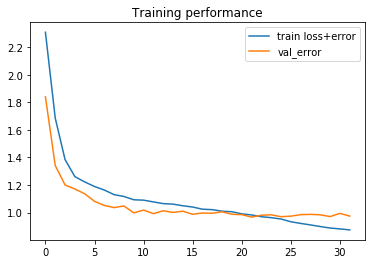

In [43]:
# Show loss curves 
plt.figure()
plt.title('Training performance')
plt.plot(HIS.epoch, HIS.history['loss'], label='train loss+error')
plt.plot(HIS.epoch, HIS.history['val_loss'], label='val_error')
plt.legend()

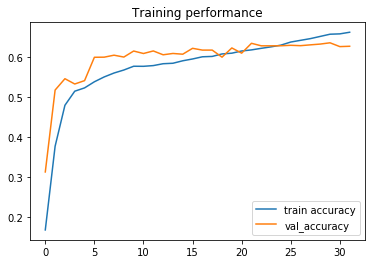

In [44]:
plt.figure()
plt.title('Training performance')
plt.plot(HIS.epoch, HIS.history['accuracy'], label='train accuracy')
plt.plot(HIS.epoch, HIS.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [45]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

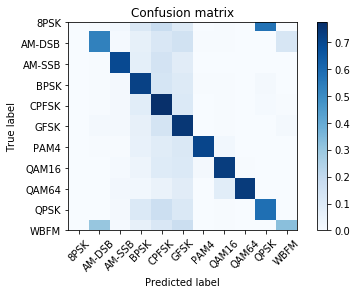

In [46]:
# Plot confusion matrix
test_Y_hat = cnn.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)
# on the right its a color chart to indicate that the darker the color the easier and thee most to identify

Overall Accuracy:  0.16195212931302455
Overall Accuracy:  0.16651162790697674
Overall Accuracy:  0.14883863080684598
Overall Accuracy:  0.1637032495401594
Overall Accuracy:  0.1832620647525962
Overall Accuracy:  0.28022318660880347
Overall Accuracy:  0.4294117647058823
Overall Accuracy:  0.6133292383292384
Overall Accuracy:  0.7420634920634921
Overall Accuracy:  0.839622641509434
Overall Accuracy:  0.8635536688902365
Overall Accuracy:  0.8790222772277227
Overall Accuracy:  0.8836273599504797
Overall Accuracy:  0.905683947532792
Overall Accuracy:  0.8640323584318607
Overall Accuracy:  0.8885714285714286
Overall Accuracy:  0.9206596141879279
Overall Accuracy:  0.8357798165137614
Overall Accuracy:  0.8791679412664424
Overall Accuracy:  0.9403726708074535


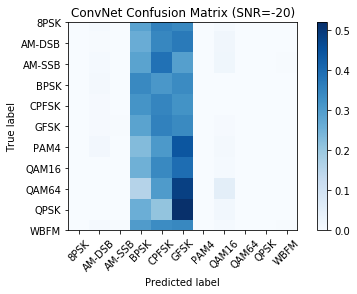

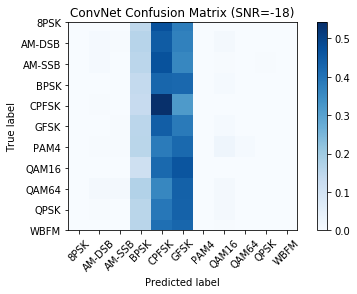

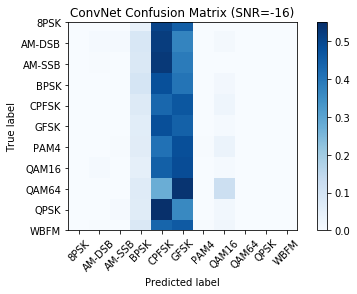

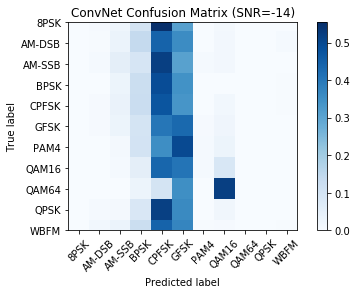

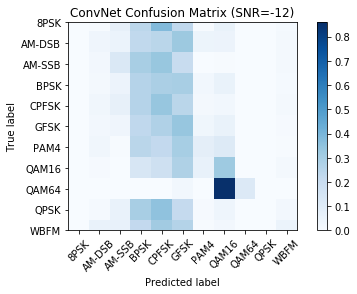

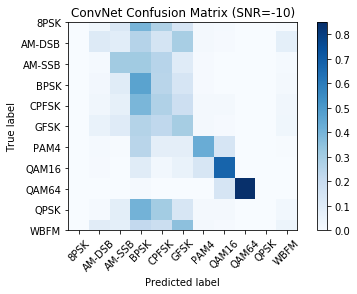

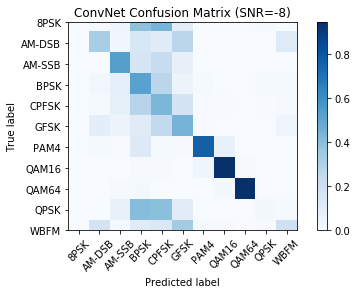

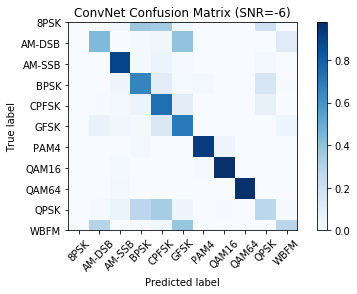

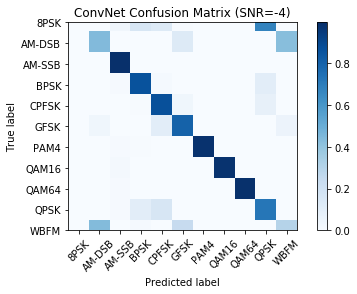

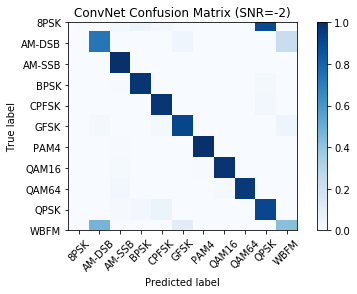

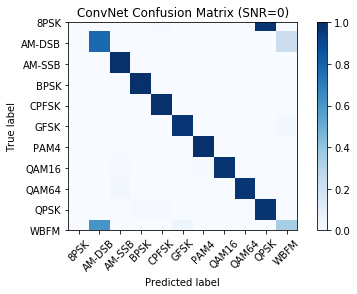

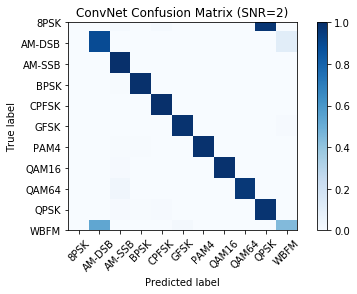

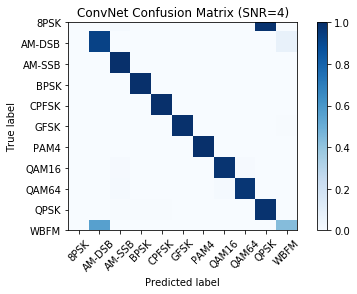

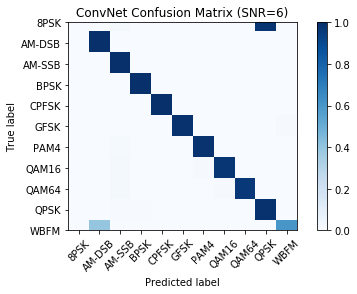

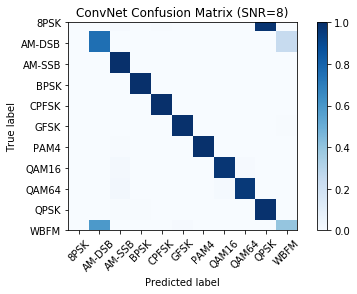

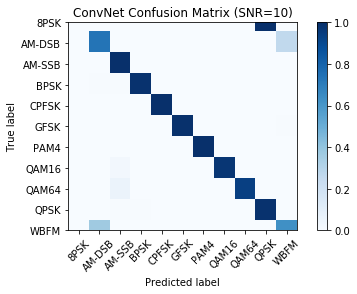

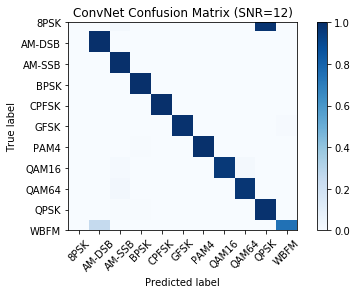

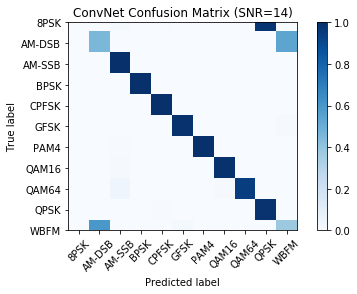

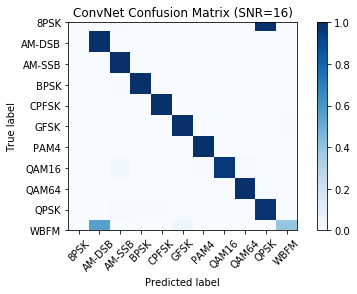

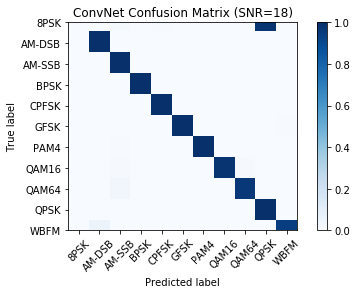

In [47]:
# Plot confusion matrix
acc = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    # estimate classes
    test_Y_i_hat = cnn.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

Text(0.5, 1.0, 'CNN2 Classification Accuracy on RadioML 2016.10 Alpha')

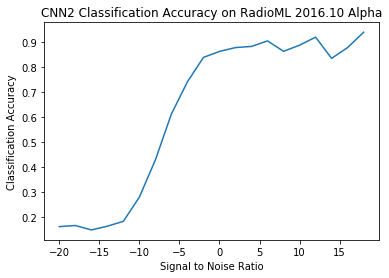

In [48]:
# Plot accuracy curve
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy on RadioML 2016.10 Alpha")

##### len(classes)